# Assignment 4

Due: Thursday Nov 6th EOD

## Q1. The Blasius equation appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 $$

### a) Express this 3rd order ODE as a system of first order ODEs.
Let:
* y1​=y
* y2​=y′
* y3​=y′′

So the final answer would be:
* y'1​= y2
* y'2​= y3
* y'3​= -y1y3





### b) Solve for $y(z)$ as an initial value problem assuming the boundary conditions below and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime\prime}(z = 0) &= 1 \\
\end{align}
$$

HINT: Read and consider part c) before implementing this.

Method:Method: For this section, you convert the 3rd-order Blasius equation into 3 first-order ODEs and solve it as an IVP. Use the given initial conditions y(0)=0, y′(0)=0,
y′′(0)=1 and integrate from z=0 to some Zmax using solve_ivp.


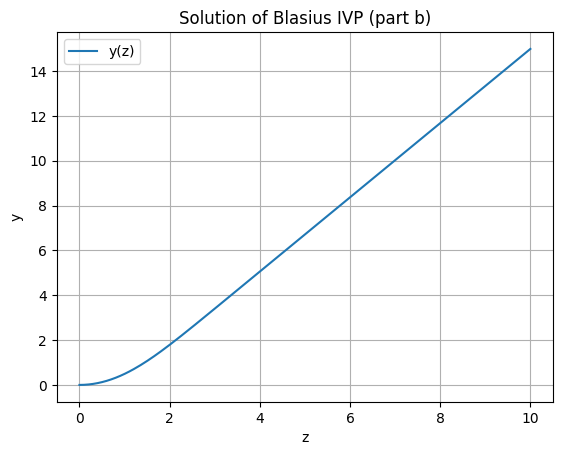

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define system
def blasius(z, Y):
    y1, y2, y3 = Y
    return [y2, y3, -y1*y3]

# Initial conditions
Y0 = [0, 0, 1]
z_span = (0, 10)
z_eval = np.linspace(0, 10, 200)

# Solve ODE
sol = solve_ivp(blasius, z_span, Y0, t_eval=z_eval)

# Plot results
plt.plot(sol.t, sol.y[0], label='y(z)')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Solution of Blasius IVP (part b)')
plt.legend()
plt.grid(True)
plt.show()


Answer: The solution increases smoothly from zero and becomes almost linear as z grows. This happens because the slope y′(z) keeps increasing since there’s no boundary condition at infinity to limit it.

## c) Use your *method* from b) to find a solution for $y(z)$ that fits the boundary conditions below, and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime}(z = \infty) &= 2 \\
\end{align}
$$

{Method, implementation, answer}

Method: For this section, you would treat y"(0) = α as an unknown. Guess α, integrate the IVP, and adjust α until 𝑦′(Z𝑚𝑎𝑥) ≈ 2. Then, use root-finding (scipy.optimize.root_scalar) or trial-and-error to get the correct value.

Reached y'(z)=2 at z ≈ 3.9444743595745138


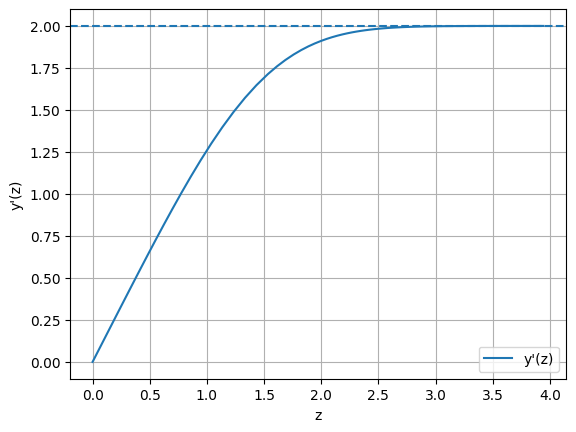

Answer: The correct initial value is 𝑦′′(0) ≈ 0.332. With this value,   y'(z) rises smoothly from 0 and levels off to 2 as z increases.


## Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

### 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

Method: The Fourier coefficients are calculated using numerical integration over one period from −𝜋 to 𝜋. The trapezoidal rule is used to approximate the integrals for 𝐴𝑛 and 𝐵𝑛​ without built-in Fourier tools.

In [19]:
import numpy as np

def fourier_coefficients(f, n, num_points=10000):

    x = np.linspace(-np.pi, np.pi, num_points)
    dx = x[1] - x[0]

    # Trapezoidal integration
    An = (1/np.pi) * np.trapezoid(f(x) * np.cos(n*x), x)
    Bn = (1/np.pi) * np.trapezoid(f(x) * np.sin(n*x), x)

    return An, Bn

# Example test case:
f = lambda x: np.sin(x)
n = 1
An, Bn = fourier_coefficients(f, n)
print(f"A{n} = {An:.5f}, B{n} = {Bn:.5f}")


A1 = 0.00000, B1 = 1.00000


Answer: For f(x)=sin(x), the result gives 𝐴1 = 0 and 𝐵1 = 1. This matches the expected analytic values where only the sine term is present in the series.

### 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [13]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

In [14]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

In [15]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

In [16]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

Method: The Fourier coefficients were calculated using the trapezoidal rule for each function up to the given order N.

In [30]:
import numpy as np

# Fourier Coefficient Function
def fourier_series_coeffs(f, N, num_points=10000):
    x = np.linspace(-np.pi, np.pi, num_points)
    A = np.zeros(N+1)
    B = np.zeros(N+1)

    for n in range(N+1):
        A[n] = (1/np.pi) * np.trapezoid(f(x) * np.cos(n*x), x)
        B[n] = (1/np.pi) * np.trapezoid(f(x) * np.sin(n*x), x)
    return A, B

# Test Functions and Results

# 1️ Function 1: f(x) = mod(x, π/2), N = 5
f = lambda x: np.mod(x, np.pi/2)
N = 5
A5, B5 = fourier_series_coeffs(f, N)
print("Function 1: f(x) = mod(x, π/2), N=5")
print("A =", np.round(A5, 3))
print("B =", np.round(B5, 3))
print("--------------------------------------------------")

# 2️ Function 2: f(x) = mod(x, π/2), N = 20
f = lambda x: np.mod(x, np.pi/2)
N = 20
A20, B20 = fourier_series_coeffs(f, N)
print("Function 2: f(x) = mod(x, π/2), N=20")
print("A =", np.round(A20, 3))
print("B =", np.round(B20, 3))
print("--------------------------------------------------")

# 3️ Function 3: f(x) = (-π/2 < x < π/2), N = 2
f = lambda x: ((x > -np.pi/2) & (x < np.pi/2)).astype(float)
N = 2
A2, B2 = fourier_series_coeffs(f, N)
print("Function 3: (-π/2 < x < π/2), N=2")
print("A =", np.round(A2, 3))
print("B =", np.round(B2, 3))
print("--------------------------------------------------")

# 4️ Function 4: f(x) = (-π/2 < x < π/2), N = 20
f = lambda x: ((x > -np.pi/2) & (x < np.pi/2)).astype(float)
N = 20
A20s, B20s = fourier_series_coeffs(f, N)
print("Function 4: (-π/2 < x < π/2), N=20")
print("A =", np.round(A20s, 3))
print("B =", np.round(B20s, 3))
print("--------------------------------------------------")


Function 1: f(x) = mod(x, π/2), N=5
A = [ 1.571  0.    -0.     0.    -0.     0.   ]
B = [ 0.   0.   0.  -0.  -0.5  0. ]
--------------------------------------------------
Function 2: f(x) = mod(x, π/2), N=20
A = [ 1.571  0.    -0.     0.    -0.     0.    -0.     0.    -0.     0.
 -0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.     0.
 -0.   ]
B = [ 0.     0.     0.    -0.    -0.5    0.     0.    -0.    -0.25   0.
  0.    -0.    -0.167  0.     0.    -0.    -0.125  0.     0.    -0.
 -0.1  ]
--------------------------------------------------
Function 3: (-π/2 < x < π/2), N=2
A = [ 1.     0.637 -0.   ]
B = [0. 0. 0.]
--------------------------------------------------
Function 4: (-π/2 < x < π/2), N=20
A = [ 1.     0.637 -0.    -0.212  0.     0.127 -0.    -0.091  0.     0.071
 -0.    -0.058  0.     0.049 -0.    -0.042  0.     0.037 -0.    -0.034
  0.   ]
B = [ 0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.
 -0. -0.  0.]
-----------------------------------

Answer: For both functions, higher values of N produce smoother approximations. Increasing N adds more harmonics, allowing the Fourier series to have more details of the original waveform.


## Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

Assuming $f$ is a cubic polynomial, what is $f(3^{-\frac{1}{2}})$? Why?


Since f(x) is a cubic polynomial it can be written as the sum of even and odd terms: f(x)=ax^3+bx^2+cx+d. The integral from −1 to 1 of f(x) only depends on the even part because the integral of any odd term over symmetric limits cancels to zero. This means that for the integral to equal 3, the function’s even terms dominate the result. Given that f(-3^{-1/2}) = 1, and since even functions satisfy f(-x) = f(x), it verifies that f(3^{-1/2}) = 1